In [10]:
library(gap)
library(dplyr)
library(ggplot2)
library(calibrate)
library(VennDiagram)

Loading required package: grid
Loading required package: futile.logger


## Panel A - Manhattan plot

In [6]:
data=read.delim("data/fig1_DEresults.txt")
#manhatten plot options 
ops=control=mht.control(cutoffs=c(-log10(0.05)),labels=paste("Chr",1:22,sep=""))
#select top 10 genes
top10m=data %>% top_n(-10,male.padj)
top10m
top10f=data %>% top_n(-10,female.padj)
top10f

X,male.estimate,male.SE,male.pval,male.padj,male.fold_change,female.estimate,female.SE,female.pval,female.padj,female.fold_change,gene,Chr,P_start,P_end
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<int>,<int>,<int>
ILMN_1772131,-1.3678242,0.05900267,6.851446e-119,8.212828e-115,2.591257,-1.568599,0.08779192,2.122469e-71,2.542506e-67,2.980852,IL1R2,2,102644699,102644748
ILMN_1772387,-1.0577491,0.04601045,5.960855e-117,7.144085e-113,2.079666,-1.347241,0.06884311,2.801431e-85,3.359756e-81,2.529944,TLR2,4,154627084,154627133
ILMN_1778444,-1.5983858,0.06010169,7.819572e-156,9.378795e-152,3.029439,-1.759324,0.08987118,2.474240e-85,2.967603e-81,3.414880,FKBP5,6,35541657,35541706
ILMN_1781468,-0.8822461,0.03809448,1.168280e-118,1.400301e-114,1.845446,-1.006352,0.05489587,4.595045e-75,5.507161e-71,2.019778,SMAP2,1,40888366,40888415
ILMN_1795298,-1.2487987,0.05328030,1.740744e-121,2.086803e-117,2.383858,-1.411567,0.08841909,2.258185e-57,2.699434e-53,2.655270,GPER,7,1133223,1133273
ILMN_1808047,-1.0173467,0.04304525,1.709737e-123,2.049803e-119,2.029168,-1.183969,0.06454982,3.829146e-75,4.589615e-71,2.281714,PHC2,1,33789972,33790021
ILMN_2072178,-1.6119171,0.06656132,1.472275e-129,1.765257e-125,3.057615,-1.930505,0.11101723,9.954501e-68,1.192052e-63,3.821436,ECHDC3,10,11805840,11805889
ILMN_2083469,-1.2381779,0.05088984,9.314350e-131,1.116977e-126,2.356296,-1.442964,0.07517965,4.190295e-82,5.025001e-78,2.749080,IRS2,13,110406764,110406813
ILMN_2305407,-1.4320617,0.05909584,1.002280e-129,1.201834e-125,2.699539,-1.490932,0.08826560,5.202457e-64,6.227341e-60,2.828560,ZBTB16,11,114121203,114121252


X,male.estimate,male.SE,male.pval,male.padj,male.fold_change,female.estimate,female.SE,female.pval,female.padj,female.fold_change,gene,Chr,P_start,P_end
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<int>,<int>,<int>
ILMN_1667371,-0.6597577,0.03169065,2.931064e-96,3.508484e-92,1.573447,-0.8134104,0.04319606,4.234231e-79,5.076842e-75,1.753914,SLA,8,134049205,134049254
ILMN_1700896,-0.9969724,0.05188975,2.865626e-82,3.423850e-78,1.988805,-1.2595337,0.06589176,1.887219e-81,2.262965e-77,2.384096,SAP30,4,174298444,174298493
ILMN_1772387,-1.0577491,0.04601045,5.960855e-117,7.144085e-113,2.079666,-1.3472413,0.06884311,2.801431e-85,3.359756e-81,2.529944,TLR2,4,154627084,154627133
ILMN_1778444,-1.5983858,0.06010169,7.819572e-156,9.378795e-152,3.029439,-1.7593238,0.08987118,2.474240e-85,2.967603e-81,3.414880,FKBP5,6,35541657,35541706
ILMN_1781468,-0.8822461,0.03809448,1.168280e-118,1.400301e-114,1.845446,-1.0063524,0.05489587,4.595045e-75,5.507161e-71,2.019778,SMAP2,1,40888366,40888415
ILMN_1781700,-0.9079105,0.05125766,3.347440e-70,3.991153e-66,1.865618,-1.1957582,0.06471408,3.130238e-76,3.752216e-72,2.285735,IL18R1,2,103014763,103014812
ILMN_1804396,-0.4827313,0.02724594,3.069863e-70,3.660505e-66,1.396793,-0.6703833,0.03581726,3.614248e-78,4.333122e-74,1.595014,IRF2BPL,14,77491396,77491445
ILMN_1808047,-1.0173467,0.04304525,1.709737e-123,2.049803e-119,2.029168,-1.1839687,0.06454982,3.829146e-75,4.589615e-71,2.281714,PHC2,1,33789972,33790021
ILMN_2081682,-0.7157529,0.03158517,1.085835e-113,1.301157e-109,1.650455,-0.8712790,0.04673254,1.414074e-77,1.695191e-73,1.840707,SMAP2,1,40888826,40888875


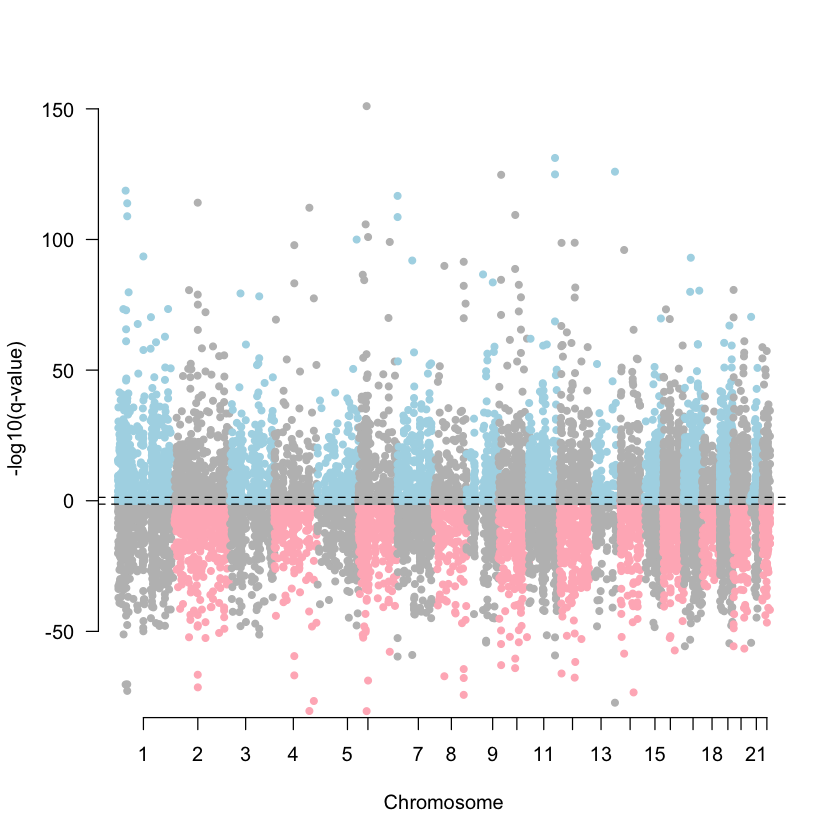

In [5]:
#png("Figure1A.png",height=3600,width=6000,res=600)
miamiplot(data,chr="Chr",bp="P_start",p="male.padj",pr="female.padj",snp="X",lcols = c(),
          col = c("lightblue", "grey"), col2 = c("grey", "lightpink"),ylab="-log10(q-value)")
abline(h = -log10(0.05),lty = 2, lwd = 1)
abline(h = log10(0.05),lty = 2, lwd = 1)
#dev.off()



## Panel B - Volcano plot

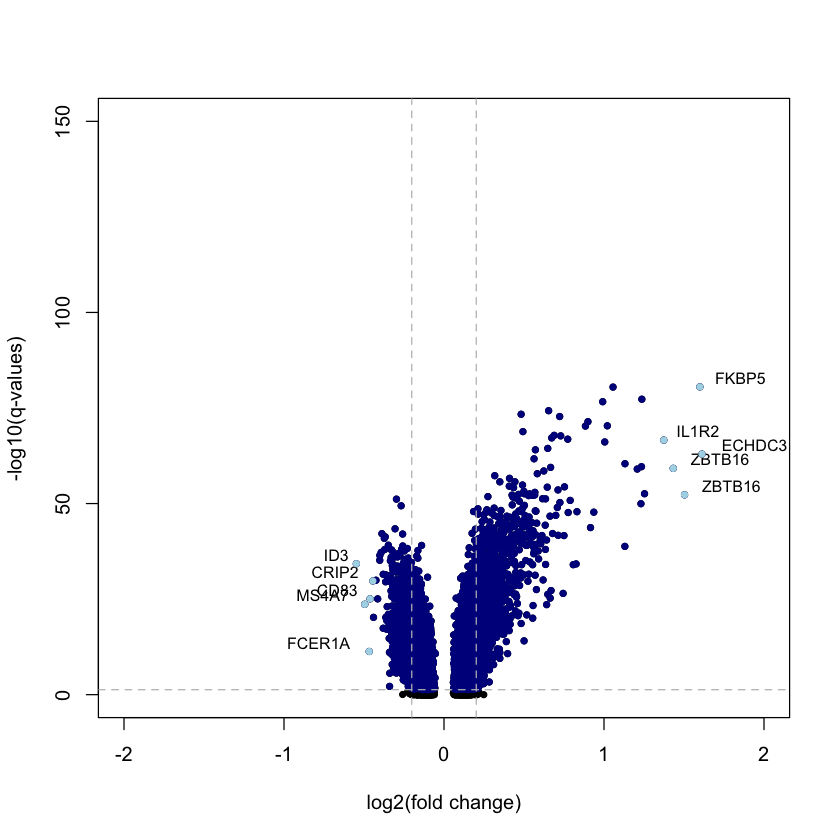

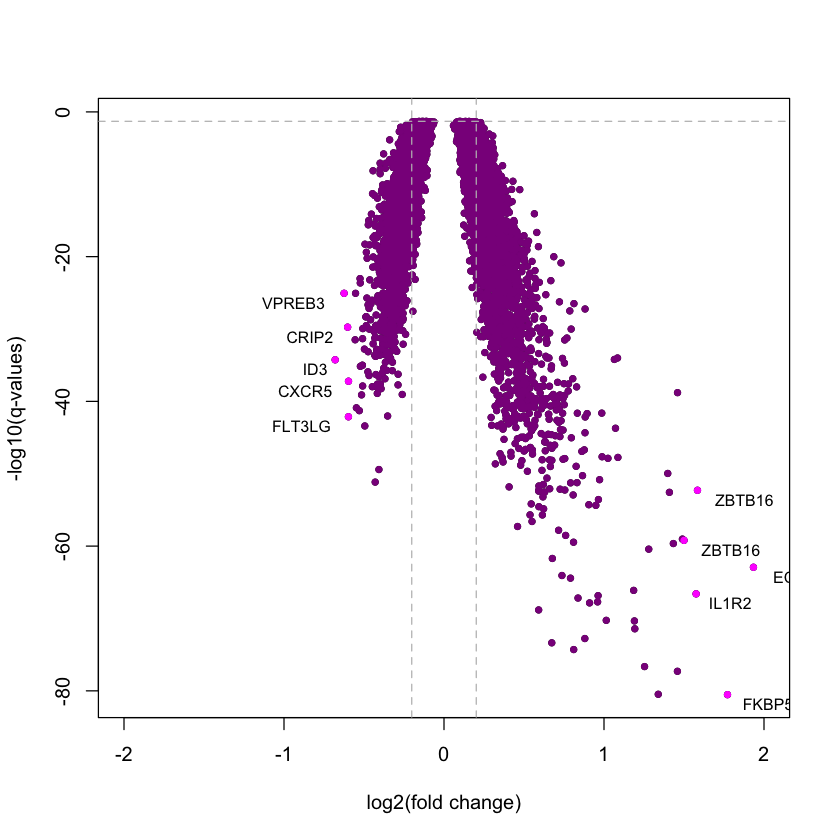

In [9]:
data.sig.male=data[ data$male.padj<=0.05,]
#png("Figure1B1.png",height=3600,width=3600,res=600)
with(data.sig.male, plot(sign(male.fold_change)*log2(abs(male.fold_change)) , -log10(female.padj), pch=20, main="",xlim=c(-2,2),ylim=c(0,150), ylab="-log10(q-values)", xlab="log2(fold change)"))
with(subset(data.sig.male, female.padj<0.05), points(sign(male.fold_change)*log2(abs(male.fold_change)) , -log10(female.padj), pch=20, col="darkblue"))
with(subset(data.sig.male, female.padj<0.05 & abs(male.fold_change)>2.5), textxy(sign(male.fold_change)*log2(abs(male.fold_change)) , -log10(female.padj),labs=gene, cex=.8))
with(subset(data.sig.male, female.padj<0.05 & male.fold_change< -1.36), textxy(sign(male.fold_change)*log2(abs(male.fold_change)) , -log10(female.padj), labs=gene, cex=.8))
with(subset(data.sig.male, female.padj<0.05 & abs(male.fold_change)>2.5), points(sign(male.fold_change)*log2(abs(male.fold_change)) , -log10(female.padj),col="lightblue", pch=20))
with(subset(data.sig.male, female.padj<0.05 & male.fold_change< -1.36), points(sign(male.fold_change)*log2(abs(male.fold_change)) , -log10(female.padj), col="lightblue", pch=20))
abline(h = -log10(0.05), col = "gray", lty = 2, lwd = 1)
abline(v = c(-log2(1.15),log2(1.15)), col = "gray", lty = 2, lwd = 1)
#dev.off()

data.sig.female=data[ data$female.padj <=0.05,]
#png("Figure1B2.png",height=3600,width=3600,res=600)
with(data.sig.female, plot(sign(female.fold_change)*log2(abs(female.fold_change)) , log10(female.padj ), pch=20, main="",xlim=c(-2,2),ylab="-log10(q-values)", xlab="log2(fold change)"))
with(subset(data.sig.female, female.padj <0.05), points(sign(female.fold_change)*log2(abs(female.fold_change)) , log10(female.padj ), pch=20, col="darkmagenta"))
with(subset(data.sig.female, female.padj <0.05 & abs(female.fold_change)>2.81), textxy(sign(female.fold_change)*log2(abs(female.fold_change)) , log10(female.padj ),labs=gene, cex=.8))
with(subset(data.sig.female, female.padj <0.05 & female.fold_change< -1.5), textxy(sign(female.fold_change)*log2(abs(female.fold_change)) , log10(female.padj ), labs=gene, cex=.8))
with(subset(data.sig.female, female.padj <0.05 & abs(female.fold_change)>2.81), points(sign(female.fold_change)*log2(abs(female.fold_change)) , log10(female.padj ),col="magenta", pch=20))
with(subset(data.sig.female, female.padj <0.05 & female.fold_change< -1.5), points(sign(female.fold_change)*log2(abs(female.fold_change)) , log10(female.padj ), col="magenta", pch=20))
abline(h = log10(0.05), col = "gray", lty = 2, lwd = 1)
abline(v = c(-log2(1.15),log2(1.15)), col = "gray", lty = 2, lwd = 1)
#dev.off()

## Panel C - Venn diagram

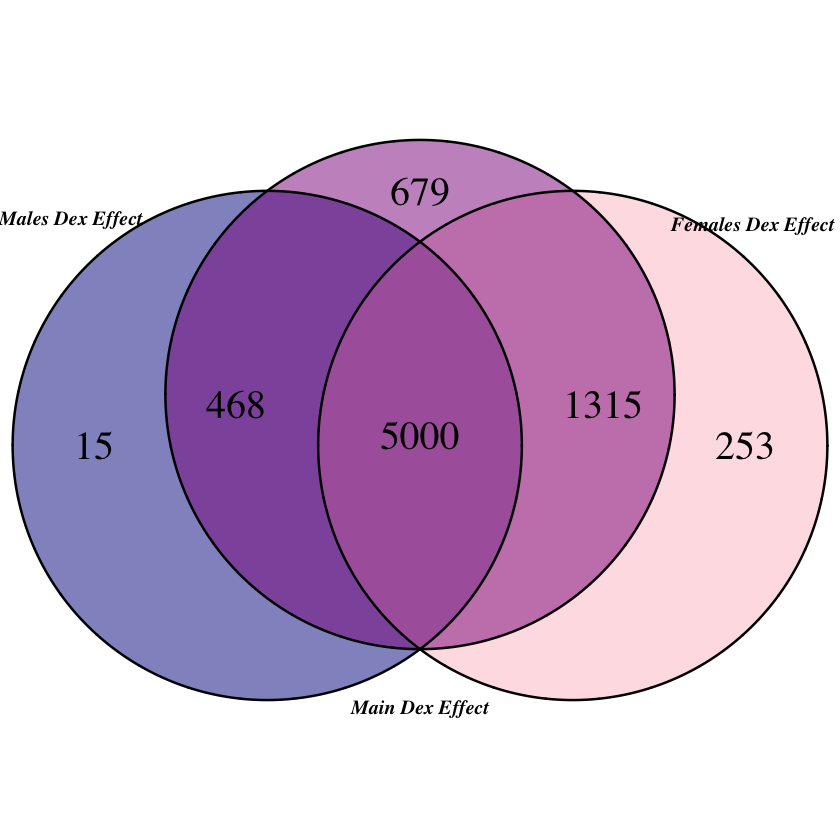

In [12]:
load(file="data/fig1C_venn_pval_list.RData")
venn.plot <- venn.diagram(overlap_mains , NULL, fill=c("darkmagenta", "darkblue", "pink"), alpha=c(0.5,0.5,0.5), euler.d=T, scaled=T,
                          cex = 2, cat.fontface=4, category.names=c("Main Dex Effect", "Males Dex Effect", "Females Dex Effect"))
grid.draw(venn.plot)
#dev.off()

In [14]:
## Panel D Venn diagrams with FC cutoff

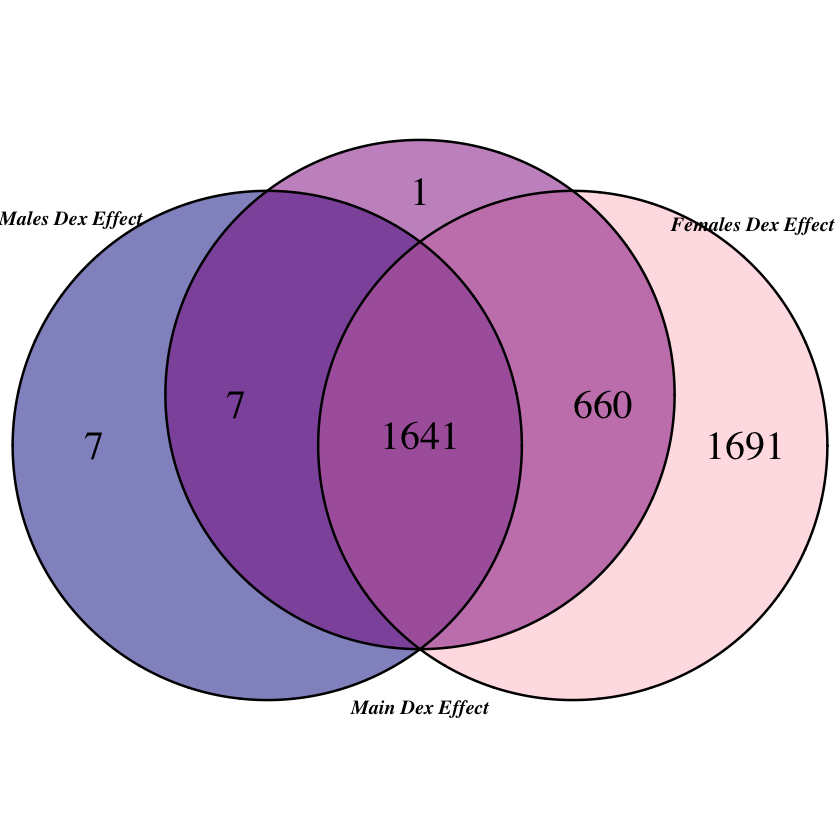

In [13]:
load(file="data/fig1D_venn_th_list.RData")
venn.plot <- venn.diagram(overlap_mains_th , NULL, fill=c("darkmagenta", "darkblue", "pink"), alpha=c(0.5,0.5,0.5), 
                          cex = 2, cat.fontface=4, category.names=c("Main Dex Effect", "Males Dex Effect", "Females Dex Effect"))
grid.draw(venn.plot)

## Panel E - Barplot

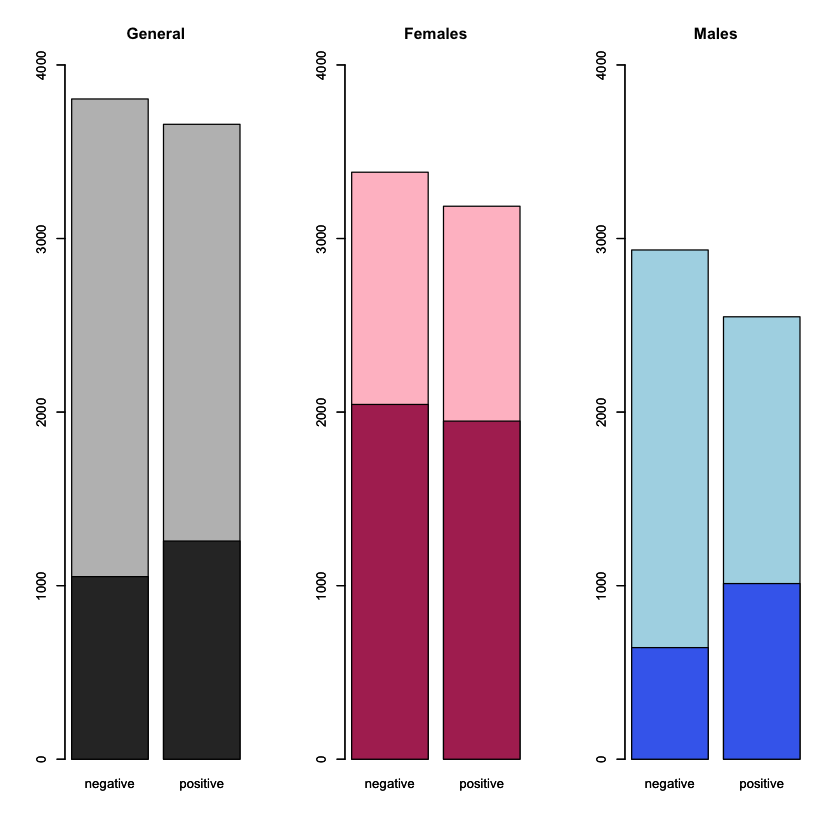

In [18]:
data_main <- read.delim("data/fig1_DEresults.txt")
data$female_direction <- ifelse(data$female.fold_change<0, "negative", "positive")
data$male_direction <- ifelse(data$male.fold_change<0, "negative", "positive")

#pdf("Figure1E.pdf")
par(mfrow=c(1,3))
barplot(table(data_main[ data_main$padj<=0.05,]$female_direction),ylim=c(0,4000), col="gray",main="General")
barplot(table(data_main[ data_main$padj<=0.05 & abs(data_main$fold_change) >1.15,]$female_direction), ylim=c(0,4000),main=NULL, col ="gray19", add=T)

barplot(table(data[ data$female.padj<=0.05,]$female_direction),ylim=c(0,4000), col="pink",main="Females")
barplot(table(data[ data$female.padj<=0.05 & abs(data$female.fold_change) >1.15,]$female_direction), main=NULL, col ="maroon", add=T)

barplot(table(data[ data$male.padj<=0.05,]$male_direction),ylim=c(0,4000), col="light blue",main="Males")
barplot(table(data[ data$male.padj<=0.05 & abs(data$male.fold_change) >1.15,]$male_direction), main=NULL, col ="royalblue2", add=T)
#dev.off()

## Panel F - Scatterplot

In [ ]:
# @Sarah please add code